In [1]:
from Grid import *

In [2]:
start=(10,25)
target=[40,25]
u=1
f=1
dims=(50,50)
U=np.zeros((1000,dims[0],dims[1]))
V=np.zeros((1000,dims[0],dims[1]))
U[:,20:30,:]=u
V[:,:,:]=0
# for i in range(30,60):
#     u[:,i]=i*.01
#v[:,30:59,]=.5
F=np.ones((1000,dims[0],dims[1]))*f


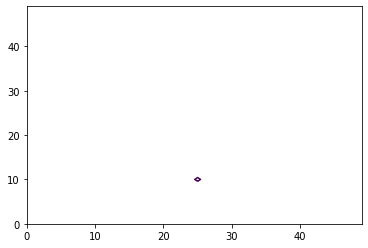

In [7]:
xslice=[slice(35,42)]
yslice=[slice(35,42)]
noentry_slices=[xslice,yslice]
cnts=Grid(dims,start,target,F,U,V,5,.5,(1,1),.5,order=2,advection_term=9)

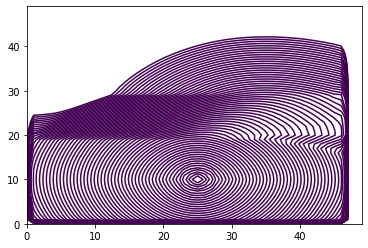

In [8]:
%matplotlib inline
cnts.main()

In [9]:
contours = cnts._zerocontourslist
len(contours)

65

<IPython.core.display.Javascript object>


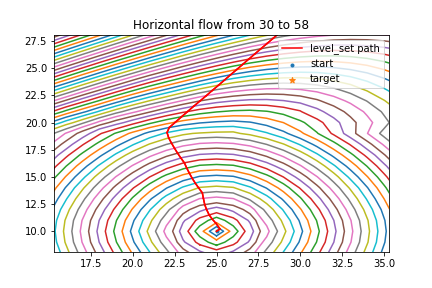

In [11]:
%matplotlib notebook
# %matplotlib inline

cnts._plot_contours_with_path3(1)
# plt.plot([20,s1,s2,s3],[20,30,58,60],color="b",marker="o",linewidth=1,label="theoretical")
#plt.scatter(y,x,color="k",label="noentry zone")
plt.title("Horizontal flow from 30 to 58")
plt.legend()
plt.show()

In [12]:
cnts._projected_pts

array([[40.        , 25.        ],
       [39.53976147, 25.19539831],
       [39.1940994 , 25.33401936],
       [38.73173383, 25.5257769 ],
       [38.27154703, 25.7208745 ],
       [37.81555296, 25.92087797],
       [37.36148986, 26.12383268],
       [36.90190297, 26.31626262],
       [36.44535724, 26.51556285],
       [35.98987061, 26.71555484],
       [35.54477492, 26.91972598],
       [35.0926154 , 27.12067765],
       [34.63066151, 27.30849452],
       [34.16947676, 27.50279944],
       [33.71436765, 27.70195928],
       [33.26484049, 27.90552381],
       [32.82144619, 28.11324249],
       [32.35778175, 28.30597049],
       [31.8997418 , 28.49292563],
       [31.45005678, 28.68824382],
       [30.9980078 , 28.87988197],
       [30.55394325, 29.0661038 ],
       [30.0859523 , 29.23579957],
       [29.62685415, 29.39173805],
       [29.18209768, 29.37189291],
       [28.70929804, 29.1154487 ],
       [28.23704396, 28.75018739],
       [27.75591464, 28.38893277],
       [27.27262819,

In [ ]:
x=list(range(35,42))
y=list(range(35,42))
xy=np.meshgrid(x,y)
x,y=xy[0],xy[1]

In [ ]:
# %matplotlib notebook
# cnts._plot_contours_with_path3(1,1)
# #plt.plot([20,s2],[20,20],color="k",marker="o",linewidth=2)
# plt.scatter(start[1],start[0],color="g",label="start")
# plt.scatter(target[1],target[0],color="c",label="target")
# #plt.scatter(y,x,color="k",label="noentry zone")
# plt.legend()
# plt.show()
# print(cnts._timestep_count)

In [ ]:
from math import sin,cos,tan,pi,atan
from scipy.optimize import minimize,NonlinearConstraint
X=target[1]-start[1]
y1=19.5
y2=40
y3=0.5
def fn(x):
    x1,x2,x3=x
    return ((y1/cos(x1))+(y2/cos(x2))+(y3/cos(x3)))/f

def constraint(x):
    x1,x2,x3=x
    return X-y1*tan(x1)-y2*(tan(x2)+(u/f)/cos(x2))-(y3*tan(x3))

con=NonlinearConstraint(constraint,0,0)
s=minimize(fn,(0,0,0),constraints=({"type":"eq","fun":constraint}))
print(s)
x=s["x"]
a0=x[0]
a1=atan(tan(x[1])+(u/f)/cos(x[1]))
a2=x[2]

s1=start[0]+y1*tan(x[0])
s2=s1+y2*tan(a1)
s3=s2+y3*tan(a2)
print(s1,s2,s3)

In [ ]:
# %matplotlib notebook
%matplotlib inline

cnts._plot_contours_with_path3(1)
# plt.plot([20,s1,s2,s3],[20,30,58,60],color="b",marker="o",linewidth=1,label="theoretical")
#plt.scatter(y,x,color="k",label="noentry zone")
plt.title("Horizontal flow from 30 to 58")
plt.legend()
plt.show()

In [ ]:
cnts._projected_pts

In [ ]:
cnts._path

In [ ]:
import os
import cv2
li=os.listdir("figures")

In [ ]:
x=sorted([int(l.strip(".png")) for l in li])
d=[str(i)+".png" for i in x]

In [ ]:
img=cv2.imread("figures/1.png")
height,width,channels=img.shape
# fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
# video=cv2.VideoWriter("vid3.avi",fourcc,5,(width,height))
fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
video=cv2.VideoWriter("vid3.avi",fourcc,5,(width,height))

In [ ]:
for i in d:
    img=cv2.imread("figures/{}".format(i))
    video.write(img)
video.release()